## Set up environment

```
conda create -n aria-tools python=3.10
conda activate aria-tools
python -m pip install projectaria-tools'[all]'
```

## Download example data

Follow instructions here to get JSON file with URLs of data:
https://facebookresearch.github.io/projectaria_tools/docs/open_datasets/aria_digital_twin_dataset/dataset_download

```
mkdir -p $HOME/Documents/projectaria_tools_adt_data
mv $HOME/Downloads/aria_digital_twin_dataset_download_urls.json $HOME/Documents/projectaria_tools_adt_data/
adt_benchmark_dataset_downloader -c $HOME/Documents/projectaria_tools_adt_data/aria_digital_twin_dataset_download_urls.json \
-o $HOME/Documents/projectaria_tools_adt_data/ \
-d 0 1 2 3 -e
```

In [8]:
from adt_data_loader import ADTSequences

data_path = "./adt_data_example/"
data_sequences = ADTSequences(data_path, verbose=True)
data_sequences.load_sequence(0)

d_frames = []
i=0
for frame in data_sequences.data:
    d_frames.append(frame)
    i += 1
    if i > 5:
        break

## Each frame provides keys:
# "rgb", "segmentation", "2dbbox", "3dbbox", "pose", "transformed_pose", "intrinsics"
# Each value of above key is a Tuple where 1st element is the data and 2nd element 
# is the dt between queried timestamp and retrieved data-timestamp (internally we are querying data
# by timestamp)

## Intrinsics are a projectaria_tools variable exposing:
#  'get_focal_lengths',
# 'get_image_size',
# 'get_label',
# 'get_principal_point',
# 'get_transform_device_camera',
# 'is_visible',
# 'model_name',
# 'project', 3D to 2D
# 'project_no_checks',
# 'projection_params',
# 'unproject', 2D to 3D  <-- this might be a helpful function: https://github.com/facebookresearch/projectaria_tools/blob/2daefbe31345bda88147b4a59e9d162910c915d4/core/calibration/CameraCalibration.h#L103
# 'unproject_no_checks'


Found 1 folders
Device ID 0
Paths:
 --ariaVrsFilePath: ./adt_data_example/apartment_clean_131/1WM103600M1292_optitrack_release_clean_seq131/video.vrs
--ariaTrajectoryFilePath: ./adt_data_example/apartment_clean_131/1WM103600M1292_optitrack_release_clean_seq131/aria_trajectory.csv
--objectTrajectoriesFilePath: ./adt_data_example/apartment_clean_131/1WM103600M1292_optitrack_release_clean_seq131/scene_objects.csv
--objectBoundingBox3dFilePath: ./adt_data_example/apartment_clean_131/1WM103600M1292_optitrack_release_clean_seq131/3d_bounding_box.csv
--segmentationsFilePath: ./adt_data_example/apartment_clean_131/1WM103600M1292_optitrack_release_clean_seq131/segmentations.vrs
--depthImagesFilePath: ./adt_data_example/apartment_clean_131/1WM103600M1292_optitrack_release_clean_seq131/depth_images.vrs
--syntheticVideoFilePath: ./adt_data_example/apartment_clean_131/1WM103600M1292_optitrack_release_clean_seq131/synthetic_video.vrs
--metaDataFilePath: ./adt_data_example/apartment_clean_131/gt-meta

[MultiRecordFileReader][DEBUG]: Opened file './adt_data_example/apartment_clean_131/1WM103600M1292_optitrack_release_clean_seq131/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][WARNING]: dataset version read (1.0) is not up to date with latest (1.1), we recommend you redownload your ADT dataset. For a full version update history, please see the ADT wiki
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file ./adt_data_example/apartment_clean_131/1WM103600M1292_optitrack_release_clean_seq131/instan

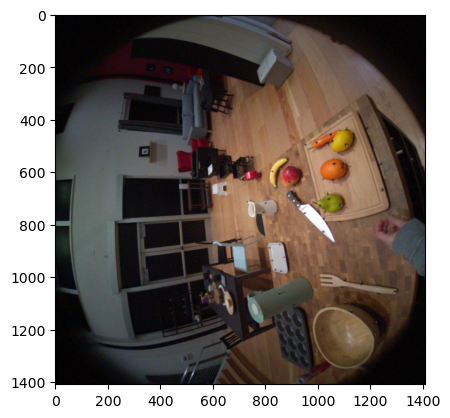

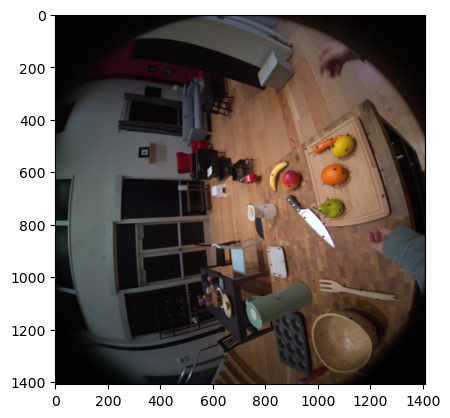

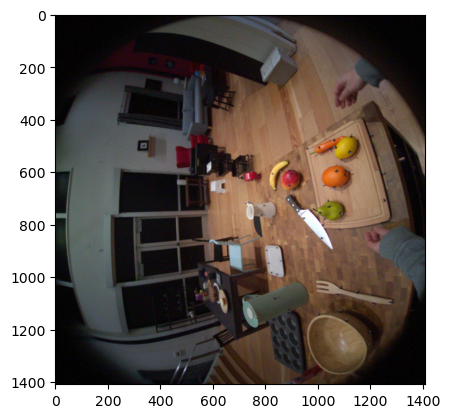

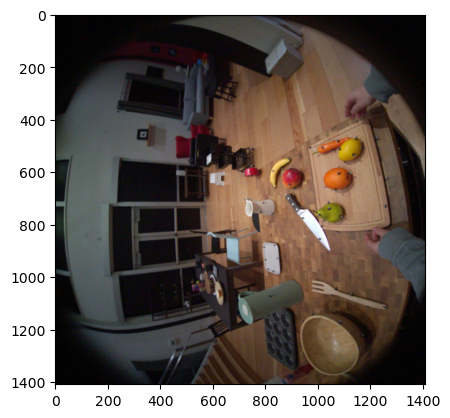

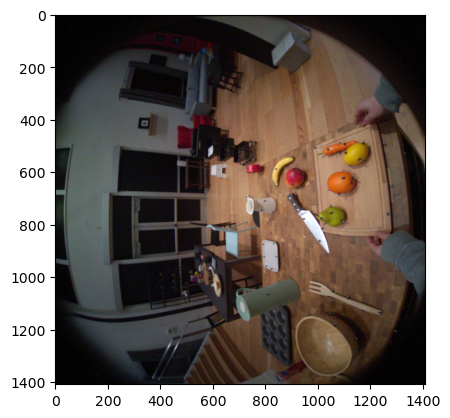

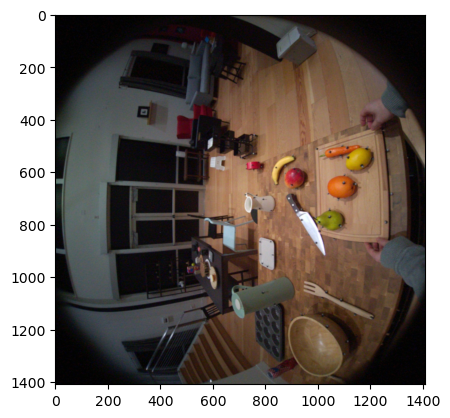

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'get_focal_lengths',
 'get_image_size',
 'get_label',
 'get_principal_point',
 'get_transform_device_camera',
 'is_visible',
 'model_name',
 'project',
 'project_no_checks',
 'projection_params',
 'unproject',
 'unproject_no_checks']

In [11]:
from matplotlib import pyplot as plt

for frame in d_frames:
    plt.figure()
    plt.imshow(frame["rgb"][0])
    plt.show()
dir(d_frames[0]["intrinsics"][0])